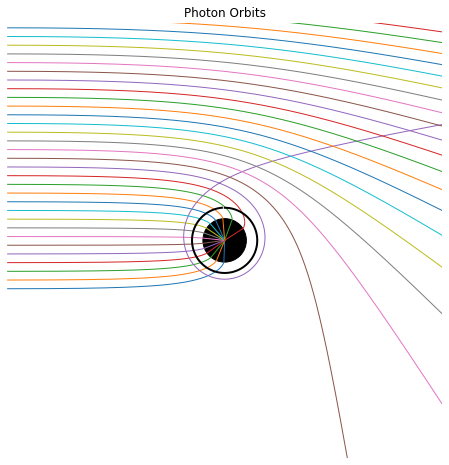

In [1]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
from matplotlib import pyplot as plt
from matplotlib import cm
import time
import os
plt.close('all')
 
def create_circle():
    circle = plt.Circle((0,0), radius= 10, color = 'black')
    return circle
 
def show_shape(patch):
    ax=plt.gca()
    ax.add_patch(patch)
    plt.axis('scaled')
     
def refindex(x,y):
    A = 10
    eps = 1e-6
    rp0 = np.sqrt(x**2 + y**2)
    n = 1/(1 - A/(rp0+eps))
    fac = np.abs((1-9*(A/rp0)**2/8))   
    nx = -fac*n**2*A*x/(rp0+eps)**3
    ny = -fac*n**2*A*y/(rp0+eps)**3
    return [n,nx,ny]
 
def flow_deriv(x_y_z,tspan):
    x, y, z, w = x_y_z
    [n,nx,ny] = refindex(x,y)
    yp = np.zeros(shape=(4,))
    yp[0] = z/n
    yp[1] = w/n
    yp[2] = nx
    yp[3] = ny
    return yp
plt.figure(figsize=(8,8))                 
for loop in range(-5,30):
    xstart = -100
    ystart = -2.245 + 4*loop
    #print(ystart)
    [n,nx,ny] = refindex(xstart,ystart)
    y0 = [xstart, ystart, n, 0]
    tspan = np.linspace(1,400,2000)
    y = integrate.odeint(flow_deriv, y0, tspan)
    xx = y[1:2000,0]
    yy = y[1:2000,1]
    lines = plt.plot(xx,yy)
    plt.setp(lines, linewidth=1)
    plt.title('Photon Orbits')
    
c = create_circle()
show_shape(c)
axes = plt.gca()
axes.set_xlim([-100,100])
axes.set_ylim([-100,100])

xstart = 0
ystart = 15
[n,nx,ny] = refindex(xstart,ystart)
y0 = [xstart, ystart, n, 0]
tspan = np.linspace(1,94,1000)
y = integrate.odeint(flow_deriv, y0, tspan)
xx = y[1:1000,0]
yy = y[1:1000,1]
lines = plt.plot(xx,yy)
plt.setp(lines, linewidth=2, color = 'black')
plt.grid('off')
plt.axis('off')
plt.savefig('photon orbit.jpg',dpi=600)
plt.show()